# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import urllib
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data_file/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [49]:
# Build partial query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
print(requests.get(url))

<Response [401]>


## Generate Cities List

In [50]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
temp = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

587

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [51]:
units = "imperial"
lat = []
temp = []
humid = []
cloud = []
wind = []
city_data = []
#the limit for the Free account is max 60 rpm at the website 
#so using a counter to fetch 50 data at a time and wait for a minute
city_count = 0
# Loop through the list of cities and perform a request for data on each
for count , city in enumerate(cities):
    #Group cities in sets of 50
    if(count % 50 == 0 and count >= 50):
        time.sleep(60)
        city_count = 0
        
        
    query_url = f"{url}appid={api_key}&units={units}&q="
    print(f"Record index is:{city_count}")
    print(query_url)
    
    #Parse out the max temp, humidity, and cloudiness
    try:
        response = requests.get(query_url + city).json()
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind})
    except:
        print("City not found. Skipping...")
        pass
    city_count = city_count + 1
print("Data Retrieval Successful")
print("-------------------------")


Record index is:0
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:1
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:2
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:3
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:4
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:5
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
City not found. Skipping...
Record index is:6
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
City not found. Skipping...
Record index is:7
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450b

Record index is:17
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
City not found. Skipping...
Record index is:18
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:19
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:20
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
City not found. Skipping...
Record index is:21
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:22
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:23
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:24
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46

Record index is:33
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:34
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:35
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:36
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:37
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:38
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:39
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:40
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:

Record index is:0
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:1
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:2
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:3
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:4
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:5
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:6
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:7
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:8
http:/

Record index is:15
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:16
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:17
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:18
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:19
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:20
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:21
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:22
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
City not found. 

Record index is:31
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:32
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:33
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:34
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
City not found. Skipping...
Record index is:35
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:36
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:37
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
City not found. Skipping...
Record index is:38
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46

Record index is:47
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:48
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:49
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:0
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:1
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:2
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:3
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:4
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:5
htt

Record index is:14
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:15
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:16
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:17
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:18
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:19
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:20
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:21
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:

Record index is:30
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:31
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:32
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:33
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:34
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:35
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
City not found. Skipping...
Record index is:36
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=imperial&q=
Record index is:37
http://api.openweathermap.org/data/2.5/weather?appid=0be5b948c46fd2a450be95e96c4d1c27&units=

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [52]:
# Convert array of JSONs into Pandas Dataframe
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the dataframe
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

#Export the City_Data into a csv
city_data_pd.to_csv('output_data_file/city_data_file.csv')

#Show Record Count
city_data_pd.count()

City          524
Cloudiness    524
Humidity      524
Lat           524
Lng           524
Max Temp      524
Wind Speed    524
dtype: int64

In [53]:
city_data_pd

,City,Cloudiness,Humidity,Lat,Lng,Max Temp,Wind Speed
0,jiuquan,0,40,39.73,98.49,44.31,6.20
1,provideniya,90,81,64.42,-173.23,48.20,17.90
2,qaanaaq,56,100,77.48,-69.36,16.68,10.22
3,khatanga,36,82,71.98,102.47,34.59,9.89
4,sitka,48,94,37.17,-99.65,64.20,0.94
5,bluff,64,41,-23.58,149.07,80.67,5.64
6,hithadhoo,76,100,-0.60,73.08,81.12,19.73
7,hofn,88,100,64.25,-15.21,40.35,26.66
8,saskylakh,24,86,71.97,114.09,31.98,12.57
9,sioux lookout,90,92,50.10,-91.92,32.00,3.62


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

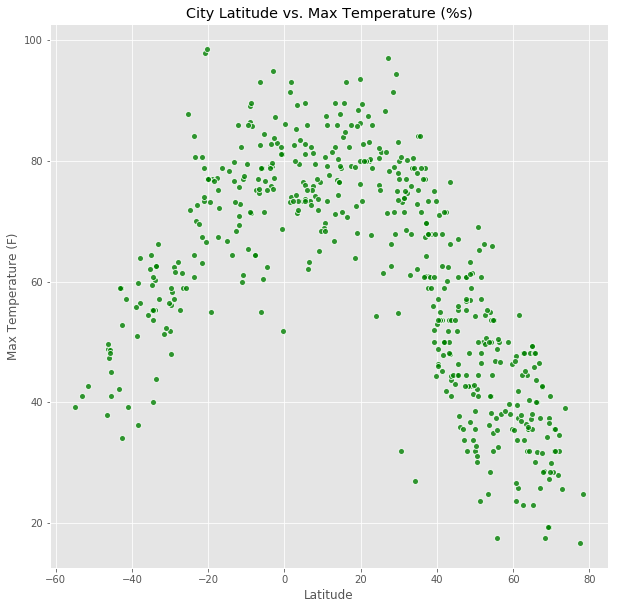

In [58]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 10))
plt.style.use('ggplot')
plt.scatter(lats,
            max_temps,
            color="green",
            edgecolor="white",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

#Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("output_data_plots/Fig1_Latitude_vs_Temperature_Plot.png")

#Show plot
plt.show()

#### Latitude vs. Humidity Plot

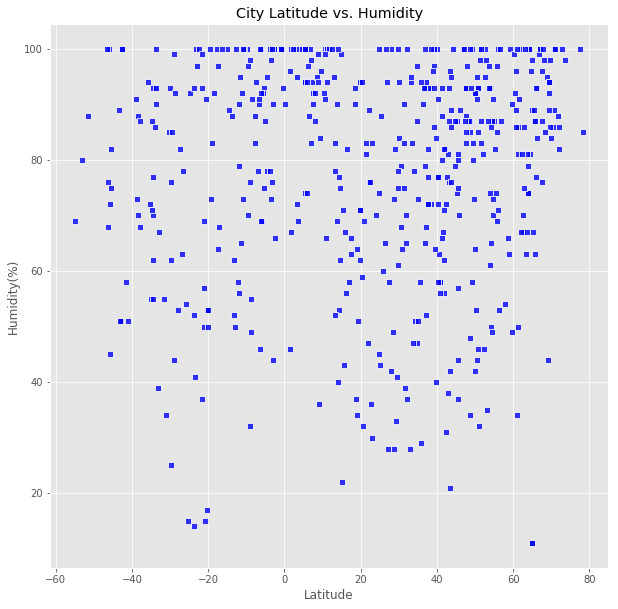

In [59]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 10))
plt.style.use('ggplot')
plt.scatter(lats,
            humidity,
            color="blue",
            edgecolor="white",
            linewidths=1,
            marker="s",
            alpha=0.8,
            label="Cities")

#Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("output_data_plots/Fig2_Latitude_vs_Humidity_Plot.png")

#Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

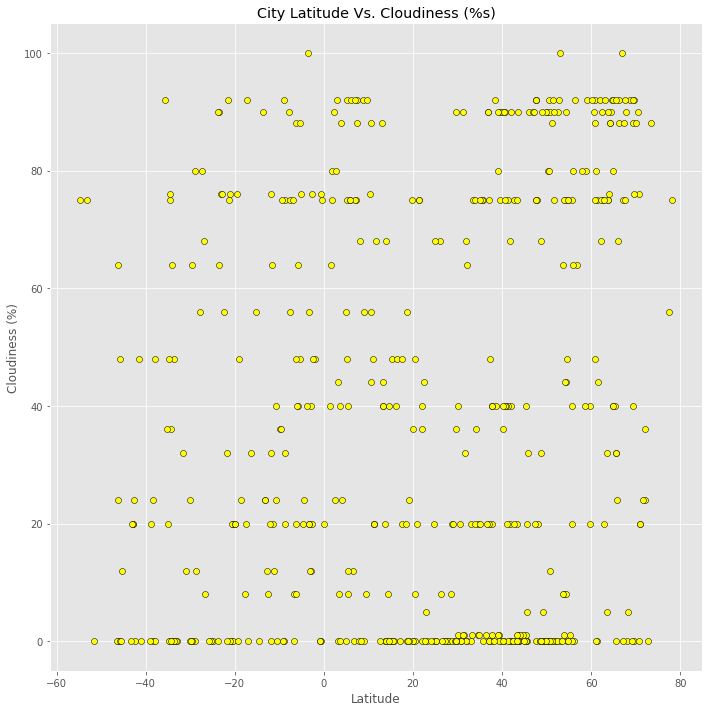

In [60]:
#Build the scatter plots for latitude vs. cloudiness plot
plt.figure(figsize=(10, 10))
plt.style.use('ggplot')
plt.scatter(lats,
            cloudiness,
            color="yellow", 
            edgecolor="black", 
            linewidths=0.5, 
            marker="o", 
            alpha = 1,
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness (%s)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save Plot
plt.savefig("output_data_plots/Fig3_Latitude_vs_Cloudiness_Plot.png")

#Show Plot
plt.tight_layout()
plt.show()


#### Latitude vs. Wind Speed Plot

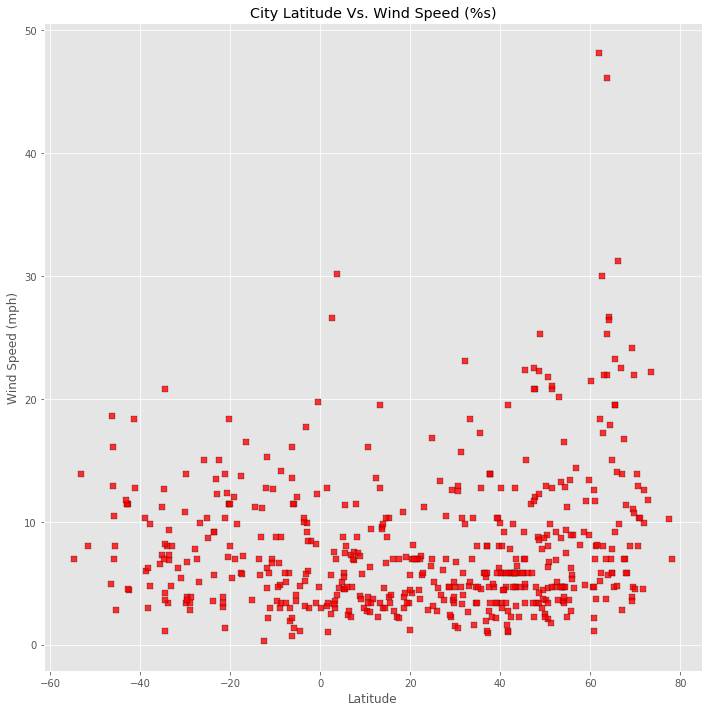

In [61]:
#Build the scatter plots for latitude vs. wind speed plot
plt.figure(figsize=(10, 10))
plt.style.use('ggplot')
plt.scatter(lats,
            wind_speed,
            color="red",
            edgecolor="black",
            linewidths=0.3,
            marker="s",
            alpha=0.8,
            label="Cities")

#Format Plot
plt.title("City Latitude Vs. Wind Speed (%s)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save
plt.savefig("output_data_plots/Fig4_Latitude_vs_Wind_Speed_Plot.png")

#Show Plot
plt.tight_layout()
plt.show()